## Challenge

Now, use Pandas to read the search results data in your MySQL tables. Create a DataFrame that contains all the search results of each Ironhack campus. Then generate a data visualization plot from the DataFrame.

It doesn't matter what data visualization plot you generate. This challenge means to let you showcase your familarity with the Pandas library and data visualization. You can generate a simple bar plot or a word cloud or anything else you like.

Write the Python code in the cell below:

In [61]:
import pandas as pd
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [62]:
cnx = mysql.connector.connect(user='root', database='iron_hack', password='testtest')
df_search_results = pd.read_sql("SELECT * FROM search_results", cnx)
cnx.close()

In [63]:
df_search_results.head()

,snippet,link,title,city
0,... time courses. Web Development Bootcamp and...,https://www.ironhack.com/en/locations/madrid,Madrid,madrid
1,... time courses. Web Development Bootcamp and...,http://www.ironhack.com/en/mobile-madrid-14.html,Ironhack Web Development Bootcamp & UX/UI Desi...,madrid
2,... time courses. Web Development Bootcamp and...,https://www.ironhack.com/es,IronHack,madrid
3,26 Jun 2017 ... La graduación de nuestro sitio...,http://blog.ironhack.com/es/,Blog de Ironhack | Preparando la siguiente gen...,madrid
4,... time courses. Web Development Bootcamp and...,https://www.ironhack.com/es/cursos,courses Ironhack offers,madrid


In [68]:
text = " ".join(snippet for snippet in df_search_results.snippet)
print ("There are {} words in the combination of all snippet.".format(len(text)))

There are 58289 words in the combination of all snippet.


In [96]:
logo_mask = np.array(Image.open("./data/logo-ironhack.png"))

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

transformed_logo_mask = np.ndarray((logo_mask.shape[0],logo_mask.shape[1]), np.int32)

for i in range(len(logo_mask)):
    transformed_logo_mask[i] = list(map(transform_format, logo_mask[i]))

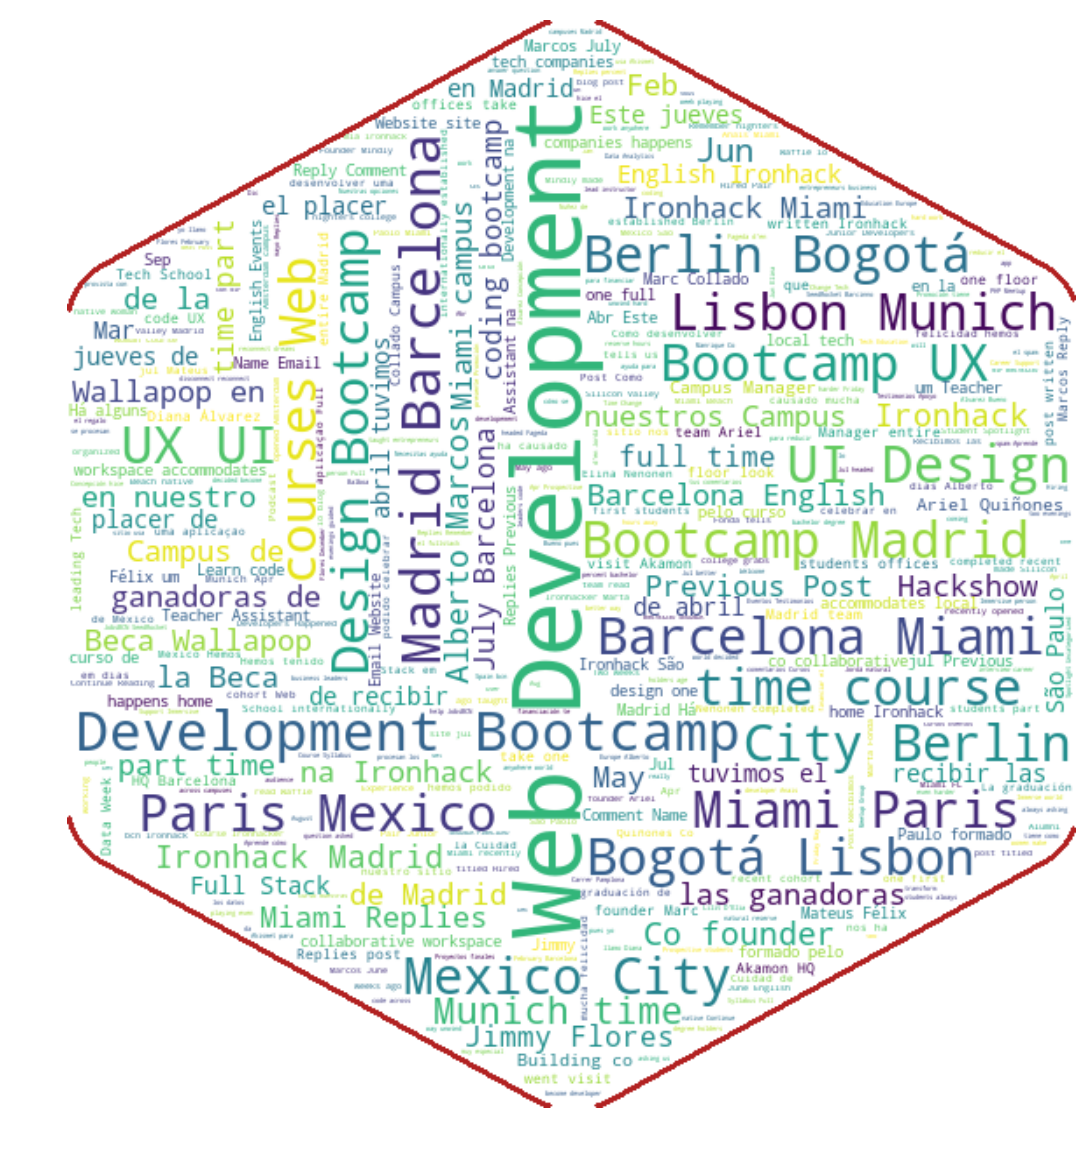

In [97]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_logo_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')
wc.generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

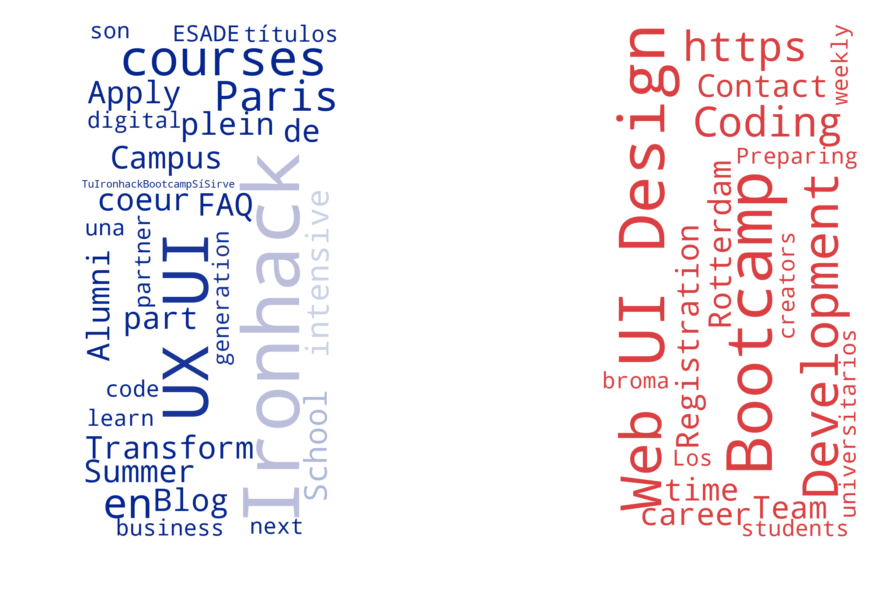

In [99]:
paris = " ".join(title for title in df_search_results[df_search_results["city"]=="paris"].title)

mask = np.array(Image.open("./data/france.png"))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(paris)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

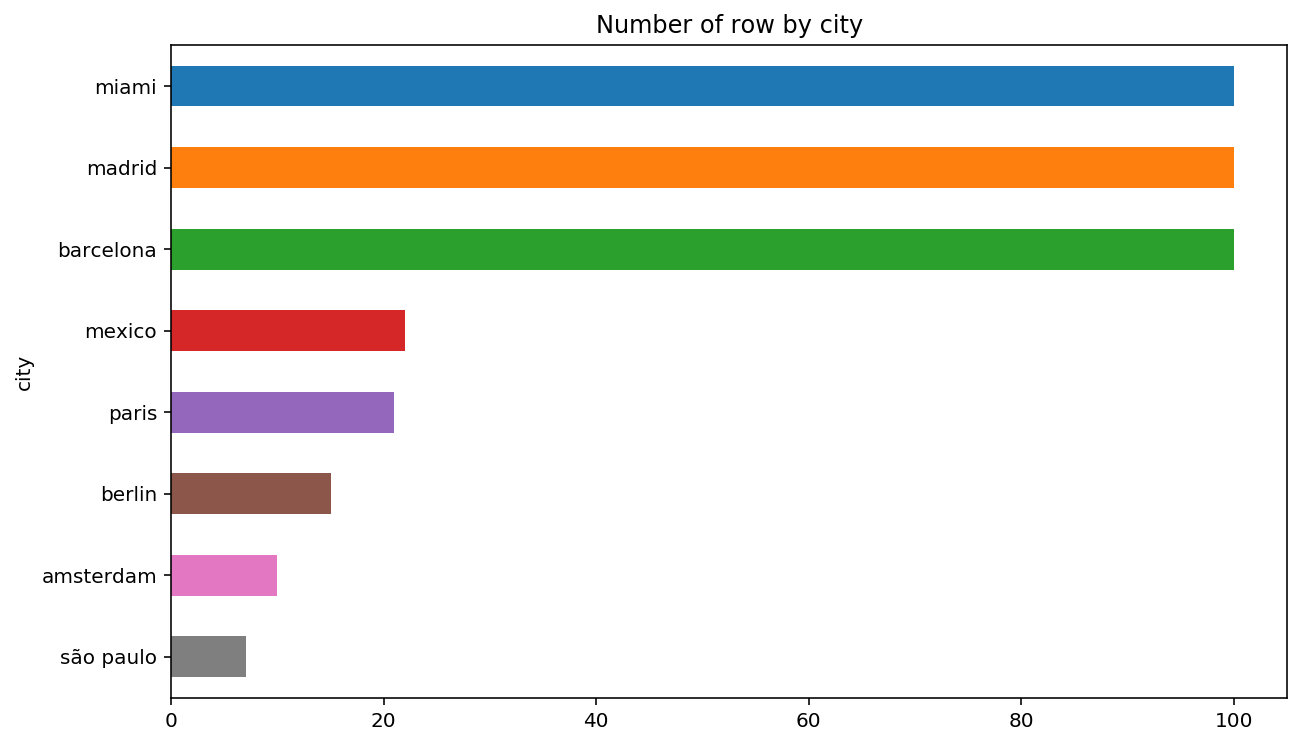

In [92]:
plt.figure(figsize=(10,6))
city = df_search_results.groupby('city').count().snippet.sort_values(ascending=False)
ax = city.plot(kind="barh")
plt.title('Number of row by city')
ax.invert_yaxis()